In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns

In [2]:
macro = pd.read_csv("book_data/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data =  np.log(data).diff().dropna()
tips = pd.read_csv("book_data/tips.csv")
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts = party_counts.loc[:, 2:5]
party_counts = party_counts.div(party_counts.sum(axis="columns"),
                                axis="index")
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])

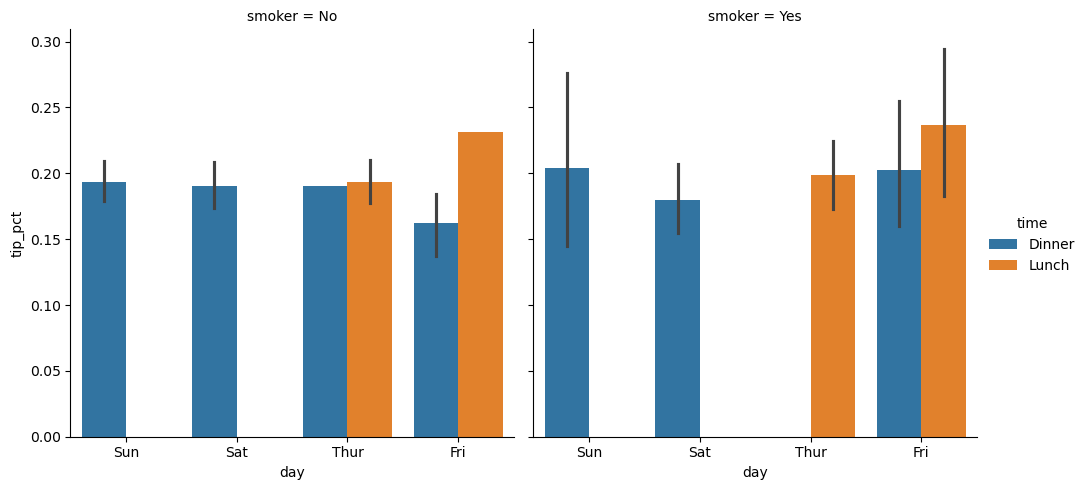

In [3]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

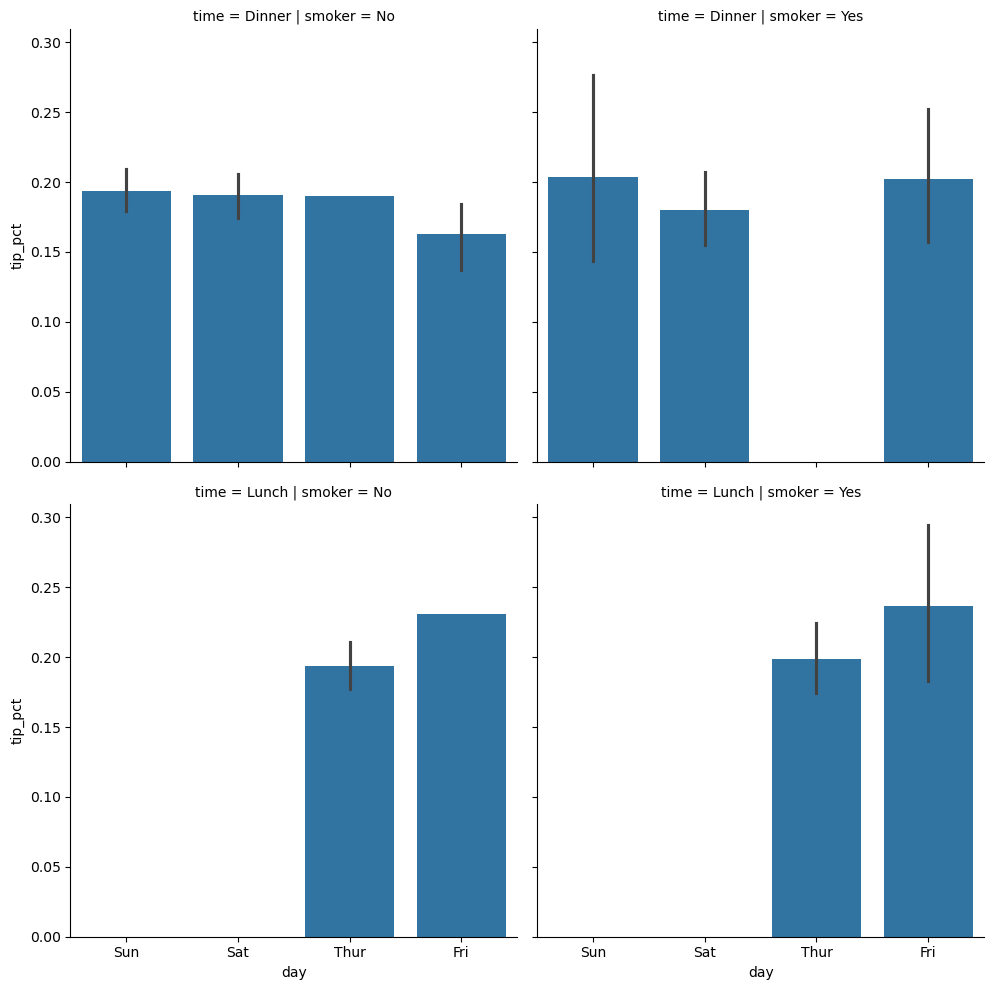

In [4]:
sns.catplot(x="day", y="tip_pct", row="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

In [5]:
df = pd.DataFrame({"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1], dtype="Int64"),
                   "data1" : np.random.standard_normal(7),
                   "data2" : np.random.standard_normal(7)})
                   

In [6]:
df

,key1,key2,data1,data2
0,a,1,0.079427,-0.168479
1,a,2,-0.945375,-1.145200
2,None,1,-0.539826,0.002826
3,b,2,0.688707,0.918037
4,b,1,-0.234518,0.482508
5,a,<NA>,-1.630249,1.935698
6,None,1,1.528532,-0.957249


In [7]:
grouped = df["data1"].groupby(df["key1"])

In [8]:
grouped

In [9]:
grouped.mean()

key1
a   -0.832066
b    0.227095
Name: data1, dtype: float64

In [10]:
means = df["data1"].groupby([df["key1"], df["key2"]]).mean()

In [11]:
means

key1  key2
a     1       0.079427
      2      -0.945375
b     1      -0.234518
      2       0.688707
Name: data1, dtype: float64

In [12]:
means.unstack()

key2,1,2
key1,,
a,0.079427,-0.945375
b,-0.234518,0.688707


In [13]:
df

,key1,key2,data1,data2
0,a,1,0.079427,-0.168479
1,a,2,-0.945375,-1.145200
2,None,1,-0.539826,0.002826
3,b,2,0.688707,0.918037
4,b,1,-0.234518,0.482508
5,a,<NA>,-1.630249,1.935698
6,None,1,1.528532,-0.957249


In [14]:
states = np.array(["OH", "CA", "CA", "OH", "OH", "CA", "OH"])

In [15]:
years = [2005, 2005, 2006, 2005, 2006, 2005, 2006]

In [16]:
df["data1"].groupby([states, years]).mean()

CA  2005   -1.287812
    2006   -0.539826
OH  2005    0.384067
    2006    0.647007
Name: data1, dtype: float64

In [17]:
df.groupby("key1").mean()

,key2,data1,data2
key1,,,
a,1.5,-0.832066,0.207340
b,1.5,0.227095,0.700272


In [23]:
df.groupby("key2").mean(numeric_only=True)

,data1,data2
key2,,
1,0.208404,-0.160099
2,-0.128334,-0.113582


In [24]:
df.groupby(["key1", "key2"]).mean()

data1     data2
key1 key2                    
a    1     0.079427 -0.168479
     2    -0.945375 -1.145200
b    1    -0.234518  0.482508
     2     0.688707  0.918037

In [25]:
df.groupby(["key1", "key2"]).size()

key1  key2
a     1       1
      2       1
b     1       1
      2       1
dtype: int64